In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
# tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","dummy","eco2","etvoc","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mg811","mh-z14a","notice","s8lp","scd30","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [11]:
# sensores = ["scd30"]
# datos = pd.concat([tb.get_df(key=sensor,
#                              start_datetime="2021-10-25",
#                              end_datetime=  "2021-11-05") for sensor in sensores],axis=1)
# datos.index = datos.index + pd.Timedelta("-5H")

<AxesSubplot:xlabel='ts'>

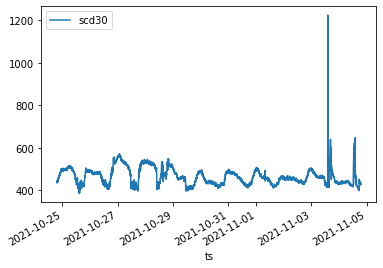

In [12]:
# datos.plot()

In [13]:
# datos.to_csv("../data/pilot_study_scd30.csv")

In [14]:
sen0220 = pd.read_csv('../data/pilot_study_sen0220.csv',index_col=0,parse_dates=True)
s8lp    = pd.read_csv('../data/pilot_study_s8lp.csv',index_col=0,parse_dates=True)
scd30   = pd.read_csv('../data/pilot_study_scd30.csv',index_col=0,parse_dates=True)

def minuto(df):
    return df.resample('1min').bfill()
sen0220 = minuto(sen0220)
s8lp = minuto(s8lp)
scd30 = minuto(scd30)
datos = pd.concat([sen0220,s8lp,scd30],axis=1)
# datos

,sen0220,s8lp,scd30
ts,,,
2021-10-24 19:00:00,433.0,428.0,440.0
2021-10-24 19:01:00,434.0,428.0,442.0
2021-10-24 19:02:00,434.0,428.0,443.0
2021-10-24 19:03:00,434.0,428.0,441.0
2021-10-24 19:04:00,435.0,428.0,442.0
...,...,...,...
2021-11-04 18:55:00,404.0,417.0,432.0
2021-11-04 18:56:00,404.0,419.0,432.0
2021-11-04 18:57:00,403.0,420.0,433.0


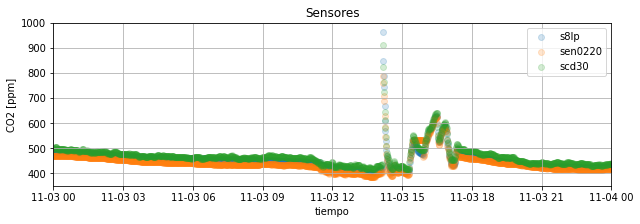

In [22]:
sensores = ["s8lp","sen0220","scd30"]

fig, ax = plt.subplots(figsize=(10,3))

fecha1 = parse("2021-11-03") 
fecha2 = fecha1 + pd.Timedelta("1D")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(350,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [ ]:
#corta los datos de la fecha inicial al final
datos = datos.truncate(before="2021-07-20 14:30:04",after="2021-07-20 15:31:04")
datos

In [ ]:
# sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220","s8lp"]
sensores = ["s8lp","sen0220","t3022","scd30"]
# ref = "fluke"

fig, ax = plt.subplots(figsize=(10,3))

# fecha1 = parse("2021-07-20 14:25") 
# fecha2 = fecha1 + pd.Timedelta("3H")
# ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,1000)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [ ]:
#ajustar fecha si es necesario
datos.to_csv("../data/sensores_20-07-2021.csv")